# Non-parametric model comparison of FACS data using log-likelihood ratio (LLR) 
---

## Setup

__Environment__

In [1]:
import os

import pandas as pd
import numpy as np
import numba
from tqdm import tqdm

import holoviews as hv
hv.extension("matplotlib")

import lateral_signaling as lsig

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

__Functions__

In [2]:
def data_to_hist(d, bins, data_range=(0, 1000)):
    """Convert sampled data to a frequency distribution (histogram)"""
    return np.histogram(d, bins=bins, range=data_range)

__Random number generation__

In [3]:
seed = 2021
rng = np.random.default_rng(seed)

__File I/O__

In [113]:
data_dir = os.path.abspath("../data")
FACS_data_dir = os.path.join(data_dir, "FACS_data")
save_dir = os.path.abspath("../plots")

save_data = False
save_figs = False
fmt = "png"
dpi = 300

<hr>

## Read in metadata and data

In [71]:
metadata = pd.read_csv(os.path.join(FACS_data_dir, "metadata.csv"))
metadata

filename     id            experiment                       label  \
0      a1.csv     a1           neg_control      control_neg_no_senders   
1      a2.csv     a2               density                 density_0.3   
2      a3.csv     a3               density                 density_0.5   
3      a4.csv     a4           pos_control                 control_pos   
4      a5.csv     a5               density                 density_2.4   
5      a6.csv     a6               density                 density_3.6   
6      a7.csv     a7               density                 density_4.8   
7      e1.csv     e1                   ECM                ECM_PDMS_0.2   
8      e2.csv     e2                   ECM                ECM_PDMS_8.0   
9      e3.csv     e3                   ECM                ECM_PDMS_64.   
10     f1.csv     f1           pos_control                 control_pos   
11     f2.csv     f2                   ECM             ECM_Fibronectin   
12     f3.csv     f3                   ECM                 ECM_Gelatin   
13     f4.csv     f4                   ECM                ECM_Matrigel   
14     g1.csv     g1          cyto_tension      tension_ROCK-inhibitor   
15     g2.csv     g2                  FGF2                        FGF2   
16     g3.csv     g3          cyto_tension        tension_Blebbistatin   
17     g4.csv     g4          cyto_tension       tension_Latrunculin-A   
18     h1.csv     h1  cyto_tension_control  tensionctrl_ROCK-inhibitor   
19     h2.csv     h2          FGF2_control                    FGF2ctrl   
20     h3.csv     h3  cyto_tension_control    tensionctrl_Blebbistatin   
21     h4.csv     h4  cyto_tension_control   tensionctrl_Latrunculin-A   
22  a4_f1.csv  a4_f1    pos_control_pooled                 control_pos   

              plotlabel  
0            Neg. Ctrl.  
1                 0.25x  
2                  0.5x  
3                (▲) 1x  
4                    2x  
5                    3x  
6                    4x  
7          0.2 kPa PDMS  
8          8.0 kPa PDMS  
9          64. kPa PDMS  
10           (●) No ECM  
11          Fibronectin  
12              Gelatin  
13             Matrigel  
14       ROCK-inhibitor  
15                 FGF2  
16         Blebbistatin  
17        Latrunculin-A  
18  ROCK-inhibitor (-S)  
19            FGF2 (-S)  
20    Blebbistatin (-S)  
21   Latrunculin-A (-S)  
22     (▲+●) Pos. Ctrl.

In [72]:
# Get data from files
files_raw = metadata.filename
filenames = []
data = []

for i, id_ in enumerate(metadata.id.values):
    f = files_raw[files_raw.str.contains(id_)].values[0]
    d = pd.read_csv(os.path.join(FACS_data_dir, f)).squeeze()
    
    filenames.append(f)
    data.append(d)

filenames = np.array(filenames)

In [73]:
# Get indices of control data
is_control = metadata.experiment.str.contains("control").values
ctrldata_idx = is_control.nonzero()[0]
expdata_idx  = (~is_control).nonzero()[0]

In [74]:
# Extract samples by ctrl vs. experimental
nc, pc1, pc2, *_, pc12 = [data[i].values for i in ctrldata_idx]
expdata_list = [data[i].values for i in expdata_idx]

# Sample sizes of positive controls 1 and 2
print("PC sample sizes:", pc1.size, ",", pc2.size)

# Mean and min of experimental sample sizes
print(f"Mean sample size of experimental samples: {np.mean([d.size for d in expdata_list]):.2f}")

min_samplesize = np.min([d.size for d in expdata_list])
print(f"Min sample size of experimental samples: {min_samplesize}")

PC sample sizes: 5314 , 5546
Mean sample size of experimental samples: 5514.47
Min sample size of experimental samples: 4660


In [75]:
# Select a subset for plotting
idx_to_plot = np.array([0, 22, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17])

<hr>

## Calculate PDF and log-PDF of reference distributions by binning

In [98]:
# Number of bins in histogram
nbins = 100

In [99]:
# Get number of observations in each bin
data_hists = np.array([data_to_hist(d.values, nbins)[0] for d in data])

# Add 1 to each bin to avoid div by 0. Then normalize and take the logarithm
data_hists_pdf    = (data_hists + 1) / np.sum(data_hists + 1, axis=1, keepdims=True)
data_hists_logpdf = np.log10(data_hists_pdf)

In [100]:
# Get ctrl and experimental sample histograms
nc_hist_logpdf, pc1_hist_logpdf, pc2_hist_logpdf, *_, pc12_hist_logpdf = data_hists_logpdf[ctrldata_idx]

In [101]:
# Calculate the log likelihood of data given empirical distributions
log_like_nc    = np.sum(data_hists *   nc_hist_logpdf, axis=1)
log_like_pc1   = np.sum(data_hists *  pc1_hist_logpdf, axis=1)
log_like_pc2   = np.sum(data_hists *  pc2_hist_logpdf, axis=1)
log_like_pc12  = np.sum(data_hists * pc12_hist_logpdf, axis=1)

# Get log-likelihood ratios (LLRs)
llr_pc1_nc  = log_like_pc1  - log_like_nc
llr_pc2_nc  = log_like_pc2  - log_like_nc
llr_pc12_nc = log_like_pc12 - log_like_nc

__Save results in metadata__

In [102]:
metadata_res = metadata.copy()
metadata_res["log_likelihood_ratio_Pos1_Neg"] = llr_pc1_nc
metadata_res["log_likelihood_ratio_Pos2_Neg"] = llr_pc2_nc
metadata_res["log_likelihood_ratio_Pos_pooled_Neg"] = llr_pc12_nc

In [126]:
# Select data for plotting
llr_data = metadata_res.iloc[idx_to_plot].copy()
llr_data = llr_data.reset_index(drop=True)
llr_data.index.name = "id_num"
llr_data = llr_data.reset_index()

# Specify the starting x-value of each spike in the spike plot
llr_data["x0"] = 0.
llr_data["label_xval"] = np.minimum(llr_data.log_likelihood_ratio_Pos_pooled_Neg.values, 0)
llr_data["label_xval2"] = llr_data.log_likelihood_ratio_Pos_pooled_Neg.min()

In [127]:
# Set colors of spikes
colors = np.array([lsig.black, lsig.cols_red[0], lsig.cols_teal[1]])
spike_colors_idx = np.zeros(llr_data.shape[0], dtype=int)

# Neg ctrl
spike_colors_idx[0] = 1

# Pooled pos ctrl
spike_colors_idx[1] = 2

# Individual pos ctrl
spike_colors_idx[4] = 2
spike_colors_idx[11] = 2

# Set colors by index
spike_colors = colors[spike_colors_idx]

In [130]:
xlim = (-5000, 16500)
xticks = np.linspace(-5000, 15000, 5)
ylim = (-1, llr_data.shape[0] + 1)

llr_points = hv.Points(
    llr_data,
    kdims=["log_likelihood_ratio_Pos_pooled_Neg", "id_num"],
).opts(
    c=spike_colors,
    s=25,
)

llr_labels = hv.Labels(
    llr_data,
    kdims=["label_xval2", "id_num"],
    vdims=["plotlabel"],
).opts(
    horizontalalignment="right",
    xoffset = -1000,
)

llr_segments = hv.Segments(
    llr_data,
    [
        "x0",
        "id_num",
        "log_likelihood_ratio_Pos_pooled_Neg",
        "id_num",
    ],
).opts(
    color=spike_colors,
)

llr_yaxis = hv.Segments(
    (0, ylim[0], 0, ylim[1]),
).opts(
    color="k",
    lw=1,
)

llr_spikeplot = (
    llr_points * llr_segments * llr_labels * llr_yaxis
    * hv.VLine(-6000)
).opts(
    invert_yaxis=True,
    hooks=[lsig.remove_RT_spines],
).opts(
#     title="High-density conditions resemble No-Senders condition",
    xlabel = r"$\log_{10}\;\left[\frac{P(x | +Senders)}{P(x | -Senders)}\right]$",
    xlim=xlim,
    xticks=xticks,
    yaxis=False,
    ylim=ylim,
    aspect=0.7,
)

/home/pbhamidi/miniconda3/envs/lateral_signaling/lib/python3.9/site-packages/holoviews/core/util.py:995: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = np.array(values)
/home/pbhamidi/miniconda3/envs/lateral_signaling/lib/python3.9/site-packages/holoviews/core/util.py:995: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = np.array(values)


:Overlay
   .Points.I    :Points   [log_likelihood_ratio_Pos_pooled_Neg,id_num]   (filename,id,experiment,label,plotlabel,log_likelihood_ratio_Pos1_Neg,log_likelihood_ratio_Pos2_Neg,x0,label_xval,label_xval2)
   .Segments.I  :Segments   [x0,id_num,log_likelihood_ratio_Pos_pooled_Neg,id_num]   (filename,id,experiment,label,plotlabel,log_likelihood_ratio_Pos1_Neg,log_likelihood_ratio_Pos2_Neg,label_xval,label_xval2)
   .Labels.I    :Labels   [label_xval2,id_num]   (plotlabel)
   .Segments.II :Segments   [x0,y0,x1,y1]
   .VLine.I     :VLine   [x,y]
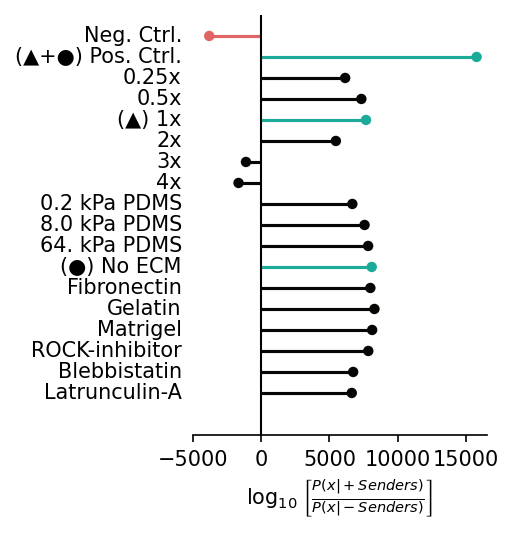

In [131]:
hv.output(llr_spikeplot, dpi=dpi//2)

In [132]:
if save_figs:
    fname = "FACS_llr_spikeplot"
    fpath = os.path.join(save_dir, fname + "." + fmt)
    hv.save(llr_spikeplot, fpath, dpi=dpi)

/home/pbhamidi/miniconda3/envs/lateral_signaling/lib/python3.9/site-packages/holoviews/core/util.py:995: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = np.array(values)
/home/pbhamidi/miniconda3/envs/lateral_signaling/lib/python3.9/site-packages/holoviews/core/util.py:995: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = np.array(values)


<hr>

## How does bin size affect log-likelihood ratio?

__Calculate log-likelihood ratio (LLR) for a range of bin sizes__

In [89]:
# Max number of bins to try
max_nbins = 10000

nbins_range = 1 + np.arange(max_nbins)

# Initialize output
llrs_nc_pc1  = np.zeros((max_nbins, len(data)))
llrs_nc_pc2  = np.zeros((max_nbins, len(data)))
llrs_nc_pc12 = np.zeros((max_nbins, len(data)))

for i, nbins in enumerate(tqdm(nbins_range)):

    # Get number of observations in each bin
    _data_hists = np.array([data_to_hist(d.values, nbins)[0] for d in data])

    # Add 1 to each bin to avoid div by 0. Then normalize and take the logarithm
    _data_hists_pdf    = (_data_hists + 1) / np.sum(_data_hists + 1, axis=1, keepdims=True)
    _data_hists_logpdf = np.log10(_data_hists_pdf)

    # Get ctrl and experimental sample histograms
    _nc_hist_logpdf, _pc1_hist_logpdf, _pc2_hist_logpdf, *_, _pc12_hist_logpdf = _data_hists_logpdf[ctrldata_idx]

    # Calculate the log likelihood of data given empirical distributions
    _log_like_nc    = np.sum(_data_hists *   _nc_hist_logpdf, axis=1)
    _log_like_pc1   = np.sum(_data_hists *  _pc1_hist_logpdf, axis=1)
    _log_like_pc2   = np.sum(_data_hists *  _pc2_hist_logpdf, axis=1)
    _log_like_pc12  = np.sum(_data_hists * _pc12_hist_logpdf, axis=1)

    # Get log-likelihood ratios (LLRs)
    llrs_nc_pc1[i]  = _log_like_nc - _log_like_pc1
    llrs_nc_pc2[i]  = _log_like_nc - _log_like_pc2
    llrs_nc_pc12[i] = _log_like_nc - _log_like_pc12

100%|█████████████████████████████████| 10000/10000 [03:06<00:00, 53.74it/s]


__Plot LLR as a function of bin size for each sample__

In [116]:
llr_nbins = hv.Overlay(
    [
        
        # Plot the LLR as a function of # of bins used
        hv.Curve(
            (nbins_range, llr),
            label=label,
        ).opts(
            linewidth=1,
        )
        for llr, label in zip(llrs_nc_pc1.T[idx_to_plot], metadata.plotlabel[idx_to_plot])
    ] + [
        
        # Add a line showing log-ratio of zero (equal likelihood)
        hv.HLine(
            0
        ).opts(
            c="k",
            linestyle="dotted",
            linewidth=1,
        )
    ]
).opts(
    aspect=2,
    legend_position="right",
    logx=True,
    xlabel="# histogram bins",
    ylabel=r"$\log_{10}$(Likelihood ratio) (LLR)"
)

:Overlay
   .Curve.Neg_full_stop_Ctrl_full_stop                                                                                 :Curve   [x]   (y)
   .Curve.Left_parenthesis_black_up_pointing_triangle_plus_black_circle_right_parenthesis_Pos_full_stop_Ctrl_full_stop :Curve   [x]   (y)
   .Curve.A_0_full_stop_25x                                                                                            :Curve   [x]   (y)
   .Curve.A_0_full_stop_5x                                                                                             :Curve   [x]   (y)
   .Curve.Left_parenthesis_black_up_pointing_triangle_right_parenthesis_1x                                             :Curve   [x]   (y)
   .Curve.A_2x                                                                                                         :Curve   [x]   (y)
   .Curve.A_3x                                                                                                         :Curve   [x]   (y)
   .Curve.A_4x                                                                                                         :Curve   [x]   (y)
   .Curve.A_0_full_stop_2_kPa_PDMS                                                                                     :Curve   [x]   (y)
   .Curve.A_8_full_stop_0_kPa_PDMS                                                                                     :Curve   [x]   (y)
   .Curve.A_64_full_stop_kPa_PDMS                                                                                      :Curve   [x]   (y)
   .Curve.Left_parenthesis_black_circle_right_parenthesis_No_ECM                                                       :Curve   [x]   (y)
   .Curve.Fibronectin                                                                                                  :Curve   [x]   (y)
   .Curve.Gelatin                                                                                                      :Curve   [x]   (y)
   .Curve.Matrigel                                                                                                     :Curve   [x]   (y)
   .Curve.ROCK_hyphen_minus_inhibitor                                                                                  :Curve   [x]   (y)
   .Curve.Blebbistatin                                                                                                 :Curve   [x]   (y)
   .Curve.Latrunculin_hyphen_minus_A                                                                                   :Curve   [x]   (y)
   .HLine.I                                                                                                            :HLine   [x,y]
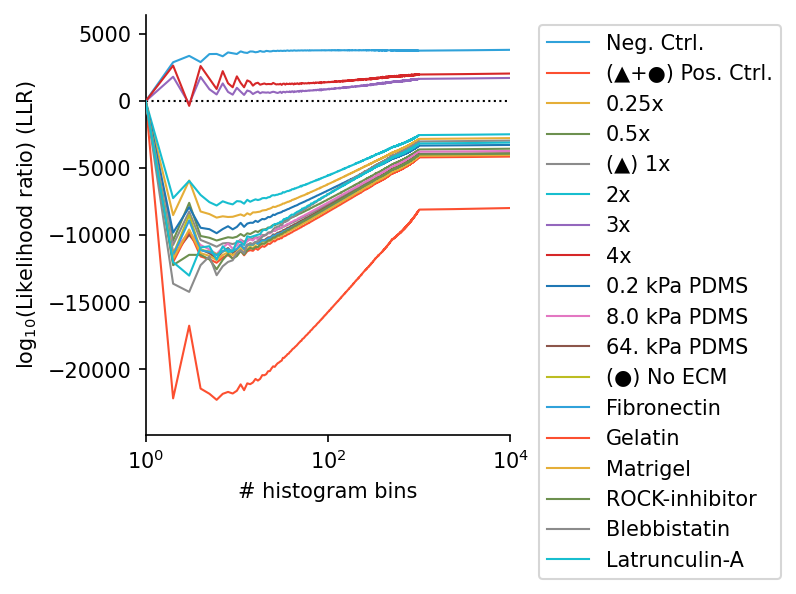

In [117]:
hv.output(llr_nbins, dpi=dpi//2)

In [ ]:
if save_figs:
    fname = "FACS_llr_vs_num_bins"
    fpath = os.path.join(save_dir, fname + "." + fmt)
    hv.save(llr_nbins, fpath, dpi=dpi)

<hr>

__Save results in new metadata file__

In [115]:
if save_data:
    fname = "metadata_with_LLR"
    fpath = os.path.join(FACS_data_dir, fname)
    metadata_res.to_csv(fpath)